In [1]:
import pandas as pd
import numpy as np
import requests

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"


In [26]:
def ko2genes(ko):
    url = 'http://rest.kegg.jp/link/genes/' + ko
    r = requests.get(url)
    geneKO = pd.DataFrame([x.split('\t') for x in r.text.split('\n')],columns=['ko','gene'])
    geneKO = geneKO.iloc[0:-1]
    return geneKO

def count_occurs(gene_df):
    gene_df['species'] = gene_df['gene'].apply(lambda x: x.split(':')[0])
    gene_df['count'] = 1
    gene_df = gene_df.groupby('species').sum()
    return gene_df


In [31]:
trx1 = 'K03671'
trx2 = 'K03672'
trxy = 'K05838'

In [32]:
genes_trx1 = ko2genes(trx1)
genes_trx2 = ko2genes(trx2)
genes_trxy = ko2genes(trxy)


species_trx1 = count_occurs(genes_trx1)
species_trx2 = count_occurs(genes_trx2)
species_trxy = count_occurs(genes_trxy)

species_trx1.columns = ['trxA']
species_trx2.columns = ['trxC']
species_trxy.columns = ['ynnC']
trxs = species_trx1.join(species_trx2).join(species_trxy).fillna(0).sum(axis=1)
trxs = pd.DataFrame(trxs,columns = ['count'])

In [66]:
grxA = 'K03674'
grxB = 'K03675' 
grxC = 'K03676'

grxs = [grxA,grxB,grxC]

grx_counts = []
for grx in grxs:
    genes = ko2genes(grx)
    species = count_occurs(genes)
    species.columns = [grx]
    grx_counts.append(species)
grx_counts = pd.concat(grx_counts,axis=1).fillna(0)

In [74]:
trxA = 'K03671'
trxC = 'K03672' 

trxs = [trxA,trxC]

trx_counts = []
for trx in trxs:
    genes = ko2genes(trx)
    species = count_occurs(genes)
    species.columns = [trx]
    trx_counts.append(species)
trx_counts = pd.concat(trx_counts,axis=1).fillna(0)

In [77]:
trx_counts.sum(axis=1).mean()

2.391812865497076

In [86]:
sum(trx_counts.sum(axis=1) > 10) / len(trx_counts)

0.01476608187134503

In [78]:
grx_counts.sum(axis=1).mean()

2.1085424302227236

In [63]:
sum(trxs['count'] == 1)

1589

In [6]:
genes_trx['species'] = genes_trx['gene'].apply(lambda x: x.split(':')[0])
genes_trx['count'] = 1


In [7]:
genes_trx_c = genes_trx.groupby('species').sum()
genes_trx_c.columns = ['gene copy number']

In [17]:
genes_trx_c['gene copy number'].mean()

2.1717171717171717

In [25]:
genes_trx_c.mean()

gene copy number    2.171717
dtype: float64

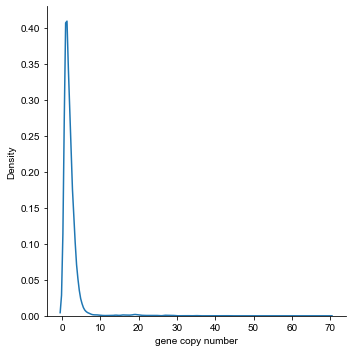

In [15]:
sns.displot(genes_trx_c,x='gene copy number',kind='kde')

In [43]:
tax = pd.read_csv('../assets/kegg/KEGG_taxonomy_Oxygen_Requirement_1430.csv')

In [44]:
g = df.join(tax.set_index('kegg_id')).dropna()

<AxesSubplot:xlabel='NAD Kinase', ylabel='CoA Kinase'>

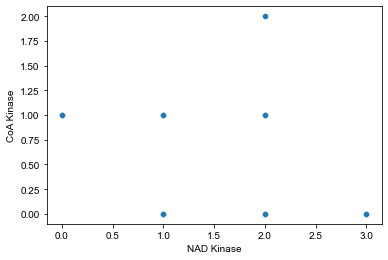

In [45]:
sns.scatterplot(x='NAD Kinase',y='CoA Kinase',data=g)

In [46]:
g[g['NAD Kinase'] < 1].phylum.unique()

array(['Firmicutes', 'Deinococcus-Thermus', 'Spirochaetes', 'Tenericutes',
       'Proteobacteria'], dtype=object)

In [47]:
g[g['NAD Kinase'] < 1].genus.unique()

array(['Clostridium', 'Deinococcus', 'Faecalitalea', 'Leptospira',
       'Mycoplasma', 'Thermus', 'Xanthomonas'], dtype=object)

In [64]:
len(g[g['NAD Kinase'] < 1])

27

In [69]:
gt = g.groupby('oxygen').count()[['species']]

In [55]:
294/ (558 + 556 + 294)

0.20880681818181818

In [70]:
gn = g[g['NAD Kinase'] < 1].groupby('oxygen').count()[['species']]

In [76]:
gt['species'].apply(lambda x: x/sum(x))

TypeError: 'int' object is not iterable

In [80]:
gt['species_frac_all_species'] = gt['species'] / sum(gt['species'])
gn['species_frac_nadkinase'] = gn['species'] / sum(gn['species'])


In [94]:
#sns.barplot(y='species_frac_nadkinase',hue='oxygen',kind='stacked',data=gn.reset_index())

In [92]:
gz = gt[['species_frac_all_species']].join(gn[['species_frac_nadkinase']])

<AxesSubplot:>

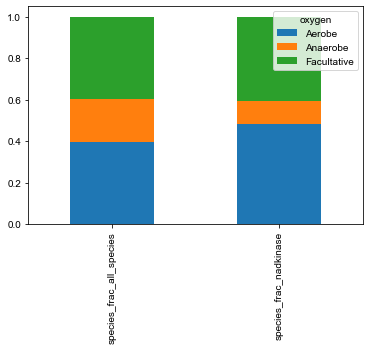

In [93]:
gz.T.plot(kind='bar', stacked=True)

In [95]:
gz

,species_frac_all_species,species_frac_nadkinase
oxygen,,
Aerobe,0.396307,0.481481
Anaerobe,0.208807,0.111111
Facultative,0.394886,0.407407


In [98]:
df[(df['CoA Kinase'] == 0) & (df['NAD Kinase'] == 0)]

,CoA Kinase,NAD Kinase
species,,


In [99]:
df

,CoA Kinase,NAD Kinase
species,,
aaa,1.0,1.0
aab,1.0,1.0
aac,1.0,1.0
aace,1.0,1.0
aaci,1.0,1.0
...,...,...
woo,0.0,1.0
xla,0.0,4.0
xph,0.0,1.0
